In [11]:
import nltk
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import matplotlib.pyplot as plt
import numpy as np
import random
import re
import string

In [2]:
nltk.download('twitter_samples')
nltk.download('stopwords')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/vc/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')
tweets = all_positive_tweets+all_negative_tweets
print("Length tweets = ",len(tweets))

Length tweets =  10000


In [14]:
labels = np.append(np.ones(len(all_positive_tweets)),np.zeros(len(all_negative_tweets)))
len(labels)

10000

In [15]:
def preprocessTweets(tweet):
    #Remove old style retweet text 'RT'
    tweet2 = re.sub(r'^RT[\s]+','',tweet)
    #Remove hyperlinks
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet2 = re.sub(r'#', '', tweet2)

    tokenizer = TweetTokenizer(preserve_case=False,strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet2)

    stopwords_english = stopwords.words('english')
    tweets_clean = []
    for words in tweet_tokens:
        if(words not in stopwords_english and words not in string.punctuation):
            tweets_clean.append(words)

    stemmer = PorterStemmer()
    tweets_stem = []
    for word in tweets_clean:
        tweets_stem.append(stemmer.stem(word))

    return tweets_stem

In [8]:
def build_freqs(tweets,ys):
    #Build frequency dictionary. For all words in the tweets,check how many times they have
    #occurred in negative and positive tweets
    yslist = np.squeeze(ys).tolist()
    
    freq = {}
    for y,tweet in zip(yslist,tweets):
        for word in preprocessTweets(tweet):
            pair = (word,y)
            if(pair in freq):
                freq[pair] += 1
            else:
                freq[pair] = 1
    
    return freq
    

In [16]:
freqs = build_freqs(tweets,labels)
print("Freq types = ",type(freqs))
print("Length of freqs = ",len(freqs))

Freq types =  <class 'dict'>
Length of freqs =  13075


In [19]:
#Doing some basic visualizations
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []
for word in keys:
    if((word,1) in freqs):
        pos = freqs[(word,1)]
    if((word,0) in freqs):
        neg = freqs[(word,0)]
    
    data.append([word,pos,neg])
data

[['happi', 211, 25],
 ['merri', 1, 25],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 1, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 2, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 48]]

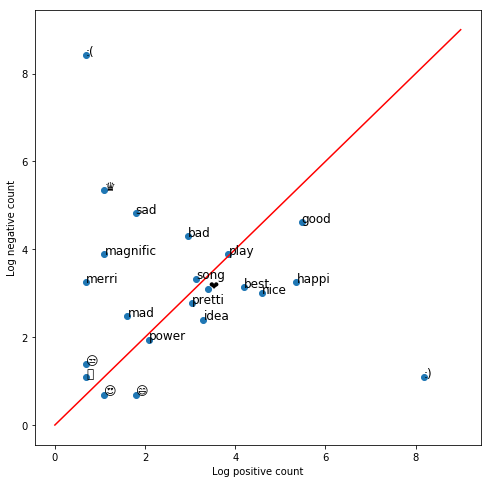

In [22]:
fig,ax = plt.subplots(figsize=(8,8))
x = np.log([x[1]+1 for x in data])
y = np.log([x[2]+1 for x in data])
ax.scatter(x,y)
plt.xlabel("Log positive count")
plt.ylabel("Log negative count")

for i in range(0,len(data)):
    ax.annotate(data[i][0],(x[i],y[i]),fontsize=12)
ax.plot([0,9],[0,9],color='red')
plt.show()